In [1]:
#This script does comparisons of the bias between trmm data and wrf outputs both in overall average,
#and mean squared bias, over land and water
#lik khian
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import glob
import re
import math
#%matplotlib qt

In [2]:
trmm15=xr.open_dataset('../WRF_Parameterization/TRMM_WRFPar2015_Regrid.nc')
trmm14=xr.open_dataset('../WRF_Parameterization/TRMM_WRFPar2014_Regrid.nc')
ti,la,lo=np.shape(trmm14.TRMM)
trmm=np.zeros([184,la,lo])
#collect JJA of both years
trmm[:92,:,:]=trmm14.TRMM[151:243,:,:]
trmm[92:,:,:]=trmm15.TRMM[151:243,:,:]
time,lats,lons=np.shape(trmm)
file_list2014=[]
file_list2015=[]
for name in glob.glob('../WRF_Parameterization/wrfpost_run*_2014_*.nc'):
    file_list2014.append(name)
for name in glob.glob('../WRF_Parameterization/wrfpost_run*_2015_*.nc'):
    file_list2015.append(name)
print(file_list2014,file_list2015)

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014.sort(key=natural_keys)
file_list2015.sort(key=natural_keys)
print(file_list2014,file_list2015)


def mskAve(data):
    mskBias=data*landmask.data
    overallMean=mskBias.sum()/(mskBias != 0).sum()
    return overallMean

for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    landmask=wrf2014.LANDMASK[0,:,:]
    gridlat=wrf2014.lat
    gridlon=wrf2014.lon
    ppt2014=wrf2014.PPT
    ppt2015=wrf2015.PPT
    ppt=np.zeros([time,lats,lons])
    ppt[:92,:,:]=ppt2014
    ppt[92:,:,:]=ppt2015
    biasAll=ppt-trmm
    biasSq=biasAll**2
    print('overall bias is ',np.mean(biasAll))
    print('overall RMSE is ',np.sqrt(np.mean(biasAll**2)))
    landBiasAll=mskAve(biasAll)
    landBiasMSE=mskAve(biasSq)
    print('land bias is ',landBiasAll)
    print('land RMSE is ',np.sqrt(landBiasMSE))
    print(np.shape(np.mean(biasSq,0)))
    
    
    plt.figure(1)
    ax1=plt.plot(np.mean(np.mean(biasAll,0),1),gridlat)
    plt.ylabel('latitude')
    plt.title('Average bias over time and lon with TRMM '+str(file_list2015[fileIndex])[24:-12])
    plt.savefig('../WRF_Parameterization/ppt_bias_lat'+file_list2015[fileIndex][24:-12]+'.png')
    plt.close()

    plt.figure(2)
    ax2=plt.subplot(projection=ccrs.PlateCarree())
    sm=ax2.pcolor(gridlon,gridlat,np.mean(biasAll,0),cmap='RdBu',vmax=10,vmin=-10)
    ax2.coastlines()
    gl=ax2.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
    gl.xlabels_top=False
    gl.ylabels_right=False
    plt.colorbar(sm)
    plt.title('Average bias with TRMM '+str(file_list2015[fileIndex])[24:-12])    
    plt.savefig('../WRF_Parameterization/ppt_bias_'+file_list2015[fileIndex][24:-12]+'.png')
    plt.close()

    plt.figure(3)
    ax3=plt.plot(gridlon,np.mean(np.mean(biasAll,0),0))
    plt.xlabel('longitude')
    plt.title('Average bias over time and lat with TRMM '+str(file_list2015[fileIndex])[24:-12])
    plt.savefig('../WRF_Parameterization/ppt_bias_lon'+file_list2015[fileIndex][24:-12]+'.png')
    plt.close()

    #plt.show()

['../WRF_Parameterization/wrfpost_run_14_2014_d01.nc', '../WRF_Parameterization/wrfpost_run_26_2014_d01.nc'] ['../WRF_Parameterization/wrfpost_run_01_2015_d01.nc', '../WRF_Parameterization/wrfpost_run_13_2015_d01.nc']
rearranging files
['../WRF_Parameterization/wrfpost_run_14_2014_d01.nc', '../WRF_Parameterization/wrfpost_run_26_2014_d01.nc'] ['../WRF_Parameterization/wrfpost_run_01_2015_d01.nc', '../WRF_Parameterization/wrfpost_run_13_2015_d01.nc']
working on../WRF_Parameterization/wrfpost_run_14_2014_d01.nc ../WRF_Parameterization/wrfpost_run_01_2015_d01.nc
overall bias is  2.37600269609
overall RMSE is  18.45988992
land bias is  3.48076533624
land RMSE is  17.6423739746
(149, 189)
working on../WRF_Parameterization/wrfpost_run_26_2014_d01.nc ../WRF_Parameterization/wrfpost_run_13_2015_d01.nc
overall bias is  1.15394614653
overall RMSE is  15.3697457746
land bias is  0.979218414941
land RMSE is  15.33736774
(149, 189)


(16, 4)
[[  2.3760027   18.45988992   3.48076534  17.64237397]
 [  1.15362362  16.64298348   3.68364231  17.14972188]
 [  1.19545173  16.77239907   2.33747283  16.14301948]
 [  2.11560208  18.34217284   3.56121511  17.15056385]
 [  1.65204417  15.6886566    0.90869953  15.16831964]
 [  0.81491651  15.28558267   1.0142519   15.12074021]
 [  0.74583202  15.45525759  -0.49187635  14.90300872]
 [  0.68508711  16.16621256   0.54368287  15.46539016]
 [  5.78731441  22.04896552   6.64300229  21.59195318]
 [  4.16519402  19.18366881   5.96030494  20.14303605]
 [  4.26624873  19.8381799    3.95635329  18.69270666]
 [  5.16391951  20.53233691   6.70806041  20.0506703 ]
 [  1.15394615  15.36974577   0.97921841  15.33736774]]


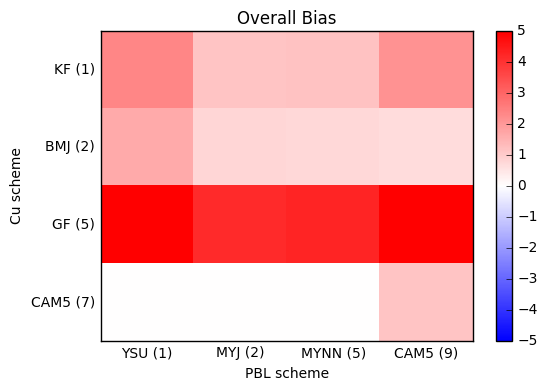

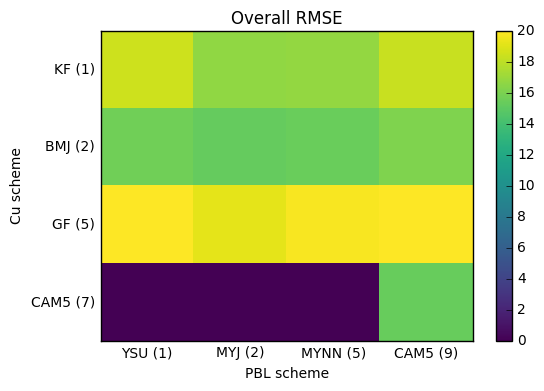

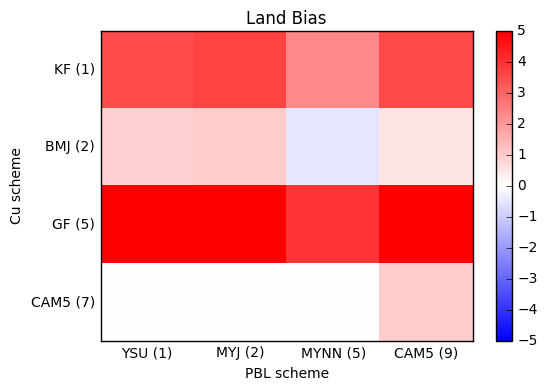

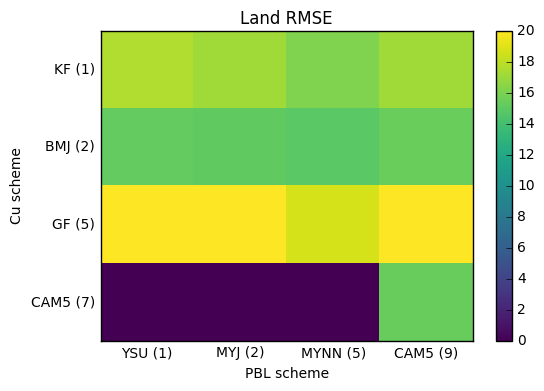

In [16]:
%matplotlib inline
biasA=np.load('../WRF_Parameterization/pptBiasMatrix.npy')
bias=np.zeros([16,4])
bias[0:12,:]=biasA[:-1,:]
bias[-1,:]=biasA[-1,:]
print(np.shape(bias))
def compareMatrix():
    ax=plt.gca()
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_minor_locator(ticker.FixedLocator(mx))
    ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['YSU (1)','MYJ (2)','MYNN (5)','CAM5 (9)']))
    plt.xlabel('PBL scheme')
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_minor_locator(ticker.FixedLocator(my))
    ax.yaxis.set_minor_formatter(ticker.FixedFormatter(['KF (1)','BMJ (2)','GF (3)','CAM5 (7)']))
    plt.ylabel('Cu scheme')
    plt.colorbar()
    plt.gca().invert_yaxis()

x=y=[0,1,2,3,4]
mx=my=[0.5,1.5,2.5,3.5]
labelx=['a','b','c','d']

landArray=np.array(bias[:,0]).reshape(4,4)
plt.figure(0)
plt.pcolormesh(y,x,landArray,cmap='bwr',vmin=-5,vmax=5)
plt.title('Overall Bias')
compareMatrix()

allArray=np.array(bias[:,1]).reshape(4,4)
plt.figure(1)
plt.pcolormesh(allArray,cmap='viridis',vmin=0,vmax=20)
plt.title('Overall RMSE')
compareMatrix()

allArray=np.array(bias[:,2]).reshape(4,4)
plt.figure(2)
plt.pcolormesh(allArray,cmap='bwr',vmin=-5,vmax=5)
plt.title('Land Bias')
compareMatrix()

allArray=np.array(bias[:,3]).reshape(4,4)
plt.figure(3)
plt.pcolormesh(allArray,cmap='viridis',vmin=0,vmax=20)
plt.title('Land RMSE')
compareMatrix()

print(biasA)